In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data
This can take about 5 minutes

In [ ]:
%%time
raw_gss = pd.read_excel("/content/drive/MyDrive/GSS.xlsx")
raw_gss

CPU times: user 4min 36s, sys: 1.4 s, total: 4min 37s
Wall time: 4min 43s


,year,id_,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,eqwlth,eqwlthy,tax,spkath,colath,libath,spksoc,colsoc,libsoc,happy
0,1972,1,Working full time,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,205,50,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,ALLOWED,ALLOWED,NOT REMOVE,ALLOWED,ALLOWED,NOT REMOVE,Not too happy
1,1972,2,Retired,.i: Inapplicable,.i: Inapplicable,YES,441,45,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,ALLOWED,NOT ALLOWED,REMOVE,ALLOWED,ALLOWED,NOT REMOVE,Not too happy
2,1972,3,Working part time,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,270,44,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,ALLOWED,NOT ALLOWED,NOT REMOVE,ALLOWED,ALLOWED,NOT REMOVE,Pretty happy
3,1972,4,Working full time,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,1,57,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,ALLOWED,NOT ALLOWED,NOT REMOVE,ALLOWED,NOT ALLOWED,NOT REMOVE,Not too happy
4,1972,5,Keeping house,.i: Inapplicable,.i: Inapplicable,YES,385,40,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,ALLOWED,ALLOWED,NOT REMOVE,ALLOWED,ALLOWED,NOT REMOVE,Pretty happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68841,2021,4467,In school,.i: Inapplicable,.i: Inapplicable,NO,-100,-100,.i: Inapplicable,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,Too low,ALLOWED,ALLOWED,NOT REMOVE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not too happy
68842,2021,4468,"With a job, but not at work because of tempora...",.i: Inapplicable,50,.i: Inapplicable,-100,-100,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,Too high,.i: Inapplicable,NOT ALLOWED,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Pretty happy
68843,2021,4469,Working full time,45,.i: Inapplicable,.i: Inapplicable,-100,-100,Someone else,.i: Inapplicable,...,5,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Pretty happy
68844,2021,4470,Retired,.i: Inapplicable,.i: Inapplicable,YES,-100,-100,Someone else,.i: Inapplicable,...,.i: Inapplicable,.i: Inapplicable,About right,ALLOWED,ALLOWED,NOT REMOVE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not too happy


# Determining the string columns

In [ ]:
str_cols = []
for col in raw_gss:
  if raw_gss[col].dtype == "object":
    str_cols.append(col)
print(len(str_cols))
str_cols

222


['wrkstat',
 'hrs1',
 'hrs2',
 'evwork',
 'wrkslf',
 'wrkgovt',
 'commute',
 'industry',
 'occ80',
 'indus80',
 'occ10',
 'indus10',
 'marital',
 'martype',
 'agewed',
 'divorce',
 'widowed',
 'spwrksta',
 'sphrs1',
 'sphrs2',
 'spevwork',
 'spwrkslf',
 'spind',
 'spocc80',
 'spind80',
 'spocc10',
 'spind10',
 'paocc16',
 'pawrkslf',
 'paind16',
 'paocc80',
 'paind80',
 'paocc10',
 'paind10',
 'maocc80',
 'mawrkslf',
 'maind80',
 'maocc10',
 'maind10',
 'sibs',
 'childs',
 'age',
 'agekdbrn',
 'educ',
 'paeduc',
 'maeduc',
 'speduc',
 'degree',
 'padeg',
 'madeg',
 'spdeg',
 'major1',
 'major2',
 'dipged',
 'spdipged',
 'whenhs',
 'whencol',
 'sector',
 'eftotlt',
 'barate',
 'gradtounder',
 'voedcol',
 'voednme1',
 'voedncol',
 'voednme2',
 'spsector',
 'speftotlt',
 'spbarate',
 'spgradtounder',
 'sex',
 'race',
 'res16',
 'reg16',
 'mobile16',
 'family16',
 'famdif16',
 'mawork',
 'mawkbaby',
 'mawkborn',
 'mawk16',
 'mawrkgrw',
 'incom16',
 'born',
 'parborn',
 'granborn',
 'hompop

# Choosing string columns

In [ ]:
str_cols1 = ['sex', 'race', 'region', 'natdrug']
raw_gss[str_cols1]
np.unique(raw_gss['race'])

array(['-100', 'Black', 'Other', 'White'], dtype=object)

# Choosing Rows
Here we only choose rows in the data where the respondent answered the question the general happiness question.

In [ ]:
unique_happy_values = np.unique(raw_gss['happy'])
valid_happy_values = unique_happy_values[4:].tolist()
gss_happy = raw_gss[(raw_gss['happy'] == valid_happy_values[0]) | (raw_gss['happy'] == valid_happy_values[1]) | (raw_gss['happy'] == valid_happy_values[2])]

# Checking Column Values
Here we check if string columns to see if they are actually numerical columns. They might be interpreted as strings because the column contains values such as "Inapplicable", however, the rest of the values may be numbers.

In [ ]:
cols_to_inspect = []
i = 0
for col in gss_happy:
  if gss_happy[col].dtype == 'object':
    unique_col_vals = np.unique(gss_happy[col])
    for val in unique_col_vals:
      if val.isdigit() == True:
        cols_to_inspect.append(col)

In [ ]:
# isdigit returns true if the string contains only digits
cols_to_inspect = np.unique(cols_to_inspect).tolist()
print("{} Columns which may be numerical columns".format(len(cols_to_inspect)))

40 Columns which may be numerical columns


In [ ]:
# cols that can be removed: dipged, eqwlth, eqwlthy, incom16, indus10, maind10, maocc10, occ10, paind10, paind16, paocc10, paocc16, polviewx,
# rincome, spind80, spocc10, spocc80

# we remove these columns because they are truly categorical columns
cols_to_remove = ['dipged', 'eqwlth', 'eqwlthy', 'incom16', 'indus10', 'maind10', 'maocc10', 'occ10', 'paind10', 'paind16',
                  'paocc16', 'polviewx', 'rincome', 'spind80', 'spocc10', 'spocc80', 'paocc10']

# print columns with numbers in them to see if they are categorical columns or numerical columns
# for i in range(len(cols_to_inspect)):
#   unique_vals = np.unique(gss_happy[cols_to_inspect[i]])
#   print("{}: {}".format(cols_to_inspect[i], unique_vals))

# remove categorical columns from columns so we only get numerical columns
cols_to_clean = [col for col in cols_to_inspect if col not in cols_to_remove]
print("{} Columns to clean".format(len(cols_to_clean)))

23 Columns to clean


# Dictionary of Invalid Values
Here we discover what values are invalid (values such as Inapplicable or No answer). 

In [ ]:
# sanity checking
unique_col_vals = []
for i in range(len(cols_to_clean)):
  unique_vals = np.unique(gss_happy[cols_to_clean[i]])
  unique_col_vals.append(unique_vals)
  #print("{}: {}".format(cols_to_clean[i], unique_vals))

begin_valid_vals = {'adults': 2,
                    'age': 3,
                    'agekdbrn': 4,
                    'agewed': 3,
                    'babies': 2, 
                    'childs': 4,
                    'commute': 3,
                    'earnrs': 2,
                    'educ': 2,
                    'hompop': 2,
                    'hrs1': 4,
                    'hrs2': 4,
                    'maeduc': 3,
                    'paeduc': 3,
                    'preteen': 2,
                    'sibs': 4,
                    'speduc': 4,
                    'sphrs1': 5-1,
                    'sphrs2': 5-1,
                    'teens': 2,
                    'unrelat': 3,
                    'whencol': 4-1,
                    'whenhs': 4-1}

vals_to_clean = {}
invals_to_replace = {}
all_possible_invalid_vals = []
for i in range(len(cols_to_clean)):
  replacement_vals = {}
  unique_vals = np.unique(gss_happy[cols_to_clean[i]])
  valid_vals = unique_vals[begin_valid_vals[cols_to_clean[i]]:]
  invalid_vals = unique_vals[:begin_valid_vals[cols_to_clean[i]]]
  vals_to_clean[cols_to_clean[i]] = valid_vals
  for val in invalid_vals:
    all_possible_invalid_vals.append(val)
    replacement_vals[val] = None
  invals_to_replace[cols_to_clean[i]] = replacement_vals
all_possible_invalid_vals = np.unique(all_possible_invalid_vals)
  #print("{}: {}".format(cols_to_clean[i], valid_vals))

# Dictionary of Invalid Values
Creating a dictionary of the form:
* {"Column" : { "Invalid Value" : "Value to Replace Invalid Value"}}
This dictionary will be used with pandas API to replace all invalid values.
We do our best to make reasonable assumptions when choosing what values to replace the invalid values with. For example, if someone indicates they do not know how many children they have then we assume 0 children since if they do not know their children then that is effectively similar to not having any.

In [ ]:
invals_to_replace = {'adults': {'.n:  No answer': 1,
  '.x:  Not available in this release': 1,
  '1 adult in household': 1,
  '8 or more': 8},
 'age': {'.d:  Do not Know/Cannot Choose': 'None',
  '.i:  Inapplicable': 'None',
  '.n:  No answer': 'None',
  '89 or older': 89},
 'agekdbrn': {'.d:  Do not Know/Cannot Choose': 'None',
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '.s:  Skipped on Web': 0},
 'agewed': {'.d:  Do not Know/Cannot Choose': 'None',
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0},
 'babies': {'.n:  No answer': 0,
  '.x:  Not available in this release': 'None',
  '0 household members under 6': 0},
 'childs': {'-100': 0,
  '-97': 0,
  '-99': 0,
  '.d:  Do not Know/Cannot Choose': 0,
  '8 or more': 8},
 'commute': {'.d:  Do not Know/Cannot Choose': 'None',
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '97+ MINUTES': 97},
 'earnrs': {'.n:  No answer': 0,
  '.x:  Not available in this release': 'None',
  'Eight or more': 8},
 'educ': {'.d:  Do not Know/Cannot Choose': 0, 
          '.n:  No answer': 'None',
          'No formal schooling': 0},
 'hompop': {'.n:  No answer': 1,
  '.x:  Not available in this release': 1},
 'hrs1': {'-97': 0,
  '.d:  Do not Know/Cannot Choose': 'None',
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '89+ hrs': 89},
 'hrs2': {'-97': 0,
  '.d:  Do not Know/Cannot Choose': 'None',
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '89+ hrs': 89},
 'maeduc': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0},
 'paeduc': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0},
 'preteen': {'.n:  No answer': 0,
  '.x:  Not available in this release': 'None',
  '0 household members between 6 to 12': 0,
  '8 or more': 8},
  'prestige': {-100: 'None',
               -98: 'None'},
  'prestg80': {-100: 'None',
                -98: 'None'}, 
 'sibs': {'-97': 0,
  '.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0},
 'speduc': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '.x:  Not available in this release': 'None'},
 'sphrs1': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '.x:  Not available in this release': 'None',
  '89+ hrs': 89},
 'sphrs2': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '.x:  Not available in this release': 'None',
  '89+ hrs': 89},
  'sppres' :{-100: 'None',
             -98: 'None'},
 'teens': {'.n:  No answer': 0, '.x:  Not available in this release': 'None',
           '0 household members between 13 to 17': 0,
           '8 or more': 8},
  'sppres80' :{-100: 'None',
             -98: 'None'},
  'papres16' : {-100: 'None',
              -98: 'None'},
  'papres80': {-100: 'None',
             -98: 'None'},
  'mapres80': {-100: 'None',
             -98: 'None'},
  'size': {-80: 'None'},
 'unrelat': {'.i:  Inapplicable': 0,
  '.n:  No answer': 0,
  '.x:  Not available in this release': 'None',
  '8 or more': 8},
 'whencol': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0},
 'whenhs': {'.d:  Do not Know/Cannot Choose': 0,
  '.i:  Inapplicable': 0,
  '.n:  No answer': 0}}

In [ ]:
num_col = []
for col in gss_happy.columns:
  if gss_happy[col].dtype == 'int64' or gss_happy[col].dtype == 'float64':
    num_col.append(col)
  elif col in vals_to_clean.keys():
    num_col.append(col)
num_col.append('happy')

In [ ]:
gss_happy_num_df = gss_happy[num_col]
# for col in gss_happy_num_df[cols_to_inspect]:
#   u = np.unique(gss_happy_num_df[col])
#   print(col, u)

In [ ]:
gss_clean = gss_happy_num_df.replace(invals_to_replace)

# Clean GSS data
Inspecting the cleaning process to ensure no errors occured. Remove columns that appear numerical but are actually categorical. For example, 'occ' contains only numerical data, however, these numbers correspond to a specific occupation such as attorny, doctor, etc. so it is not numerical data.

In [ ]:
# categorical columns: occ, spocc, anything with dot (18 cols)
for col in gss_clean:
  u = np.unique(gss_clean[col].tolist())
  print(col, u)

year [1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021]
id_ [   1    2    3 ... 4507 4509 4510]
hrs1 ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76'
 '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '9'
 'None']
hrs2 ['0' '1' '10' '11' '12' '13' '15' '16' '17' '18' '2' '20' '21' '22' '23'
 '24' '25' '26' '27' '28' '3' '30' '32' '33' '34' '35' '36' '37' '38' '39'
 '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '5' '50' '52' '55' '56'
 '58' '6' '60' '65' '66' '68' '7' '70' '72' '75' '8' '80' '84' '89' '9'
 'None']
occ [-100  -99  -9

In [ ]:
cols_to_drop = []
for col in gss_clean.columns:
  if "dot" in col:
    cols_to_drop.append(col)
  elif col == "occ":
    cols_to_drop.append(col)
  elif col == "spocc":
    cols_to_drop.append(col)
gss_almost_clean = gss_clean.drop(columns=cols_to_drop)

In [ ]:
for col in gss_almost_clean:
  u = np.unique(gss_almost_clean[col].tolist())
  print(col, u)

year [1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021]
id_ [   1    2    3 ... 4507 4509 4510]
hrs1 ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76'
 '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '9'
 'None']
hrs2 ['0' '1' '10' '11' '12' '13' '15' '16' '17' '18' '2' '20' '21' '22' '23'
 '24' '25' '26' '27' '28' '3' '30' '32' '33' '34' '35' '36' '37' '38' '39'
 '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '5' '50' '52' '55' '56'
 '58' '6' '60' '65' '66' '68' '7' '70' '72' '75' '8' '80' '84' '89' '9'
 'None']
prestige ['12' '14

# Conversion
Convert the GSS dataframe to a pure numerical data since all the numbers were previously represented as strings

In [ ]:
X_gss = gss_almost_clean.drop(columns='happy').apply(pd.to_numeric, errors='coerce')
y_gss = gss_almost_clean['happy']
X_gss

,year,id_,hrs1,hrs2,prestige,commute,prestg80,agewed,sphrs1,sphrs2,...,whenhs,whencol,hompop,babies,preteen,teens,adults,unrelat,earnrs,size
0,1972,1,0.0,0.0,50.0,0.0,NaN,0.0,0.0,0.0,...,0,0,1,0.0,0.0,0.0,1,0.0,1.0,72.0
1,1972,2,0.0,0.0,45.0,0.0,NaN,21.0,0.0,0.0,...,0,0,2,0.0,0.0,0.0,2,0.0,0.0,72.0
2,1972,3,0.0,0.0,44.0,0.0,NaN,20.0,0.0,0.0,...,0,0,4,0.0,1.0,1.0,2,0.0,2.0,72.0
3,1972,4,0.0,0.0,57.0,0.0,NaN,24.0,0.0,0.0,...,0,0,2,0.0,0.0,0.0,2,0.0,2.0,72.0
4,1972,5,0.0,0.0,40.0,0.0,NaN,22.0,0.0,0.0,...,0,0,2,0.0,0.0,0.0,2,0.0,1.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68841,2021,4467,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,0,0,1,NaN,NaN,NaN,1,NaN,NaN,NaN
68842,2021,4468,0.0,50.0,NaN,0.0,NaN,0.0,NaN,NaN,...,0,0,1,NaN,NaN,NaN,1,NaN,NaN,NaN
68843,2021,4469,45.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,0,0,1,NaN,NaN,NaN,1,NaN,NaN,NaN
68844,2021,4470,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,0,0,1,NaN,NaN,NaN,1,NaN,NaN,NaN


In [ ]:
df_gss = pd.concat([X_gss, y_gss], axis=1)
df_gss.shape

(64068, 34)

# Dropping Not A Number values
Some 'None' values were converted to NaN values some columns contain a large proportion of NaN values. We drop columns where more than 40% of its column consists of NaN values.

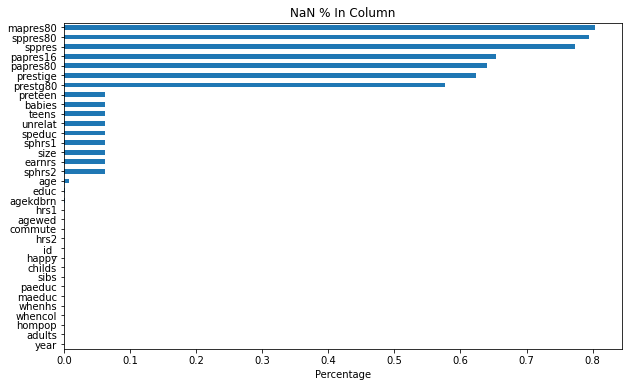

In [ ]:
t = df_gss.isnull().sum(axis = 0)/64068
plt.figure(figsize=(10,6))
plt.title("NaN % In Column")
plt.xlabel("Percentage")
t.sort_values().plot(kind='barh')

In [ ]:
#df_gss.isna().sum()/64068
THRESHOLD = int(64068*.4)
df_gss_nan_min = df_gss.dropna(axis=1, thresh=THRESHOLD)
df_gss_nan_min.drop(columns='prestg80', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Fill NaN
Columns still contain NaN values to we convert the NaN values to -1

In [ ]:
best_gss = df_gss_nan_min.fillna(-1)

In [ ]:
best_gss.shape

(64068, 27)

# Categorical Columns
We use the same method as above to clean the categorical columns

In [ ]:
categorical_gss = raw_gss[str_cols1]
# This joins both categorical dataframe and numerical dataframe along the index
catnum_gss = best_gss.join(categorical_gss)
catnum_gss.shape

(64068, 31)

In [ ]:
for col in str_cols1:
  u = np.unique(catnum_gss[col])
  print(col, u)

sex ['.i:  Inapplicable' '.n:  No answer' '.s:  Skipped on Web' 'FEMALE'
 'MALE']
race ['-100' 'Black' 'Other' 'White']
region ['East north central' 'East south atlantic' 'Middle atlantic' 'Mountain'
 'New england' 'Pacific' 'South atlantic' 'West north central'
 'West south central']
natdrug ['.d:  Do not Know/Cannot Choose' '.i:  Inapplicable' '.n:  No answer'
 '.s:  Skipped on Web' 'ABOUT RIGHT' 'TOO LITTLE' 'TOO MUCH']


In [ ]:
cat_invals_to_replace = {'sex': 
                              {'.i:  Inapplicable': "Unknown",
                              '.n:  No answer': "Unknown",
                              '.s:  Skipped on Web': "Unknown"},
                         'race': 
                              {'-100': "Unknown"},
                         'natdrug':
                              {'.d:  Do not Know/Cannot Choose': 'Unknown',
                                '.i:  Inapplicable': 'None',
                                '.n:  No answer': "Unknown",
                                '.s:  Skipped on Web': 'Unknown'}
                          }

In [ ]:
clean_catnum_gss = catnum_gss.replace(cat_invals_to_replace)

In [ ]:
for col in str_cols1:
  u = np.unique(clean_catnum_gss[col])
  print(col, u)

sex ['FEMALE' 'MALE' 'Unknown']
race ['Black' 'Other' 'Unknown' 'White']
region ['East north central' 'East south atlantic' 'Middle atlantic' 'Mountain'
 'New england' 'Pacific' 'South atlantic' 'West north central'
 'West south central']
natdrug ['ABOUT RIGHT' 'None' 'TOO LITTLE' 'TOO MUCH' 'Unknown']


In [ ]:
for col in clean_catnum_gss.columns:
  u = np.unique(clean_catnum_gss[col])
  print(col , u)

year [1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021]
id_ [   1    2    3 ... 4507 4509 4510]
hrs1 [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89.]
hrs2 [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 15. 16. 17.
 18. 20. 21. 22. 23. 24. 25. 26. 27. 28. 30. 32. 33. 34. 35. 36. 37. 38.
 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 50. 52. 55. 56. 58. 60. 65. 66.
 68. 70. 72. 75. 80. 84. 89.]
commute [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 20. 22. 24. 25. 28. 30. 32. 35. 40. 43. 45. 46. 50. 55. 60. 70. 75.
 9

# Saving Final Dataframe
Finally we save our dataframes. One contains just the numerical data and one contains both the chosen categorical columns along with the numerical columns.

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Class: Big Data Analytics/MentalHealthProject/catnum_gss.csv"
clean_catnum_gss.to_csv(filepath, index=False)

In [ ]:
best_gss.to_csv("/content/drive/MyDrive/Colab Notebooks/Class: Big Data Analytics/best_gss.csv",
                index=False)